## Q1 (a)

In [1]:
import cvxpy as cp
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
import pandas as pd

Text(0.5, 1.0, 'Dataset Visualisation')

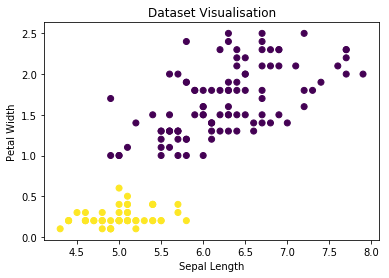

In [2]:
dataset = load_iris()
df = pd.DataFrame()
df['SL'] = dataset['data'][:,0]
df['PW'] = dataset['data'][:,3]
new = [1]*150
new[50:] = [-1]*100
df['Class']=new
X = np.array(df[['SL','PW']])
y = np.array(df['Class'])
plt.scatter(df['SL'],df['PW'],c=df['Class'])
plt.ylabel('Petal Width')
plt.xlabel('Sepal Length')
plt.title('Dataset Visualisation')

### 1(a)(i)

In [3]:
w = cp.Variable(2)
bias = cp.Variable()
objective = cp.Minimize(0.5*cp.norm(w,p=2)**2)
const = [y[i]*(X[i]*w+bias)>=1 for i in range(150)]
prob = cp.Problem(objective,constraints=const)
prob.solve()

12.499999992199678

In [4]:
w.value,bias.value

(matrix([[-2.46457378e-10],
         [-5.00000000e+00]]), 4.000000000523911)

### 1(a)(ii) - Dual Values

I have printed the dual values below. There are totally number of points that equal the dataset in dual formulation. The coefficients are non-zero for the Support Vectors and zero for the rest, since they satisfy the inequality by definiton.

In [5]:
for i in range(len(const)):
    print(const[i].dual_value*10**10)

0.7968253148302716
0.7764043995475238
0.7594477977159716
0.7519665462479198
0.7861145782321056
1.792224198721604
0.989898133730647
0.7861145782321056
0.7384700921069984
0.6242799252666243
0.8367075839577534
0.7675564295541787
0.6182714157113401
0.5926176793095621
0.9183743077531664
2.288136501934967
1.792224198721604
1.0628318564010826
1.2701162225927416
1.0628318564010826
0.8367075839577534
1.5950365985276513
0.7519665462479198
3.140380122538008
0.7675564295541787
0.7861145782321056
1.5549200418053286
0.8086960973992243
0.8086960973992243
0.7594477977159716
0.7675564295541787
1.792224198721604
0.6450885177873615
0.8533516181229819
0.6242799252666243
0.7861145782321056
0.8533516181229819
0.6242799252666243
0.7384700921069984
0.7968253148302716
1.0440516346504976
0.9800158122890561
0.7384700921069984
124999987067.81537
1.5950365985276513
1.0134909315899008
0.7968253148302716
0.7519665462479198
0.8219148443818531
0.7861145782321056
0.7052973459290253
0.5668849018674443
0.561179491071559


In [6]:
new_dual = [const[i].dual_value for i in range(len(const))]
new_index = []
for i in range(len(new_dual)):
    if new_dual[i]>0.1:
        new_index.append(i)
new_index

[43, 57, 60, 62, 67, 79, 81, 93]

In [7]:
X[new_index]

array([[5. , 0.6],
       [4.9, 1. ],
       [5. , 1. ],
       [6. , 1. ],
       [5.8, 1. ],
       [5.7, 1. ],
       [5.5, 1. ],
       [5. , 1. ]])

### 1(a)(iii)  Plot learnt SVM with Margin and Classification Plane

In [8]:
## Used to compute the lines!
def line(w,x,b):
    return -(float(w[0])*x+b)/(float(w[1]))
def _class_(w,x,cls,b):
    return (cls-(b+float(w[0])*x))/float(w[1])

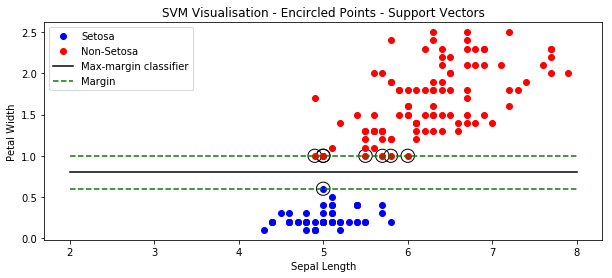

In [9]:
# Adding samples to circle - the support vectors
positive_class = []
negative_class = []
for i in range(len(X)):
    if (X[i]*w.value+bias.value)[0]<=1.00005 and (X[i]*w.value+bias.value)[0]>=0.99995:
        positive_class.append(X[i])
    if (X[i]*w.value+bias.value)[0]<=-0.00005 and (X[i]*w.value+bias.value)[0]>=-1.00005:
        negative_class.append(X[i])
# Plotting the found support vectors        
plt.figure(figsize=(10,4))
ax=plt.gca()
for i in range(len(positive_class)):
    ax.add_artist(plt.Circle((positive_class[i][0],positive_class[i][1]),0.08,fill=False))
for i in range(len(negative_class)):
    ax.add_artist(plt.Circle((negative_class[i][0],negative_class[i][1]),0.08,fill=False))

plt.plot(X[:,0][:50],X[:,1][:50],"bo",label='Setosa')
plt.plot(X[:,0][50:],X[:,1][50:],"ro",label='Non-Setosa')
plt.plot([i for i in range(2,9)],[line(w.value,i,bias.value) for i in range(2,9)],c='black',label='Max-margin classifier')
plt.plot([i for i in range(2,9)],[_class_(w.value,i,1,bias.value) for i in range(2,9)],c='green',label='Margin',ls='--')
plt.plot([i for i in range(2,9)],[_class_(w.value,i,-1,bias.value) for i in range(2,9)],c='green',ls='--')

plt.xlabel('Sepal Length',fontsize=10)
plt.ylabel('Petal Width')
plt.title('SVM Visualisation - Encircled Points - Support Vectors')
plt.legend()

### 1(a)(iv) Sklearn's SVM

In [10]:
from sklearn.svm import LinearSVC
svc = LinearSVC()
svc.fit(X,y)
svc.intercept_,svc.coef_

(array([0.51109739]), array([[ 0.24929268, -2.53100582]]))

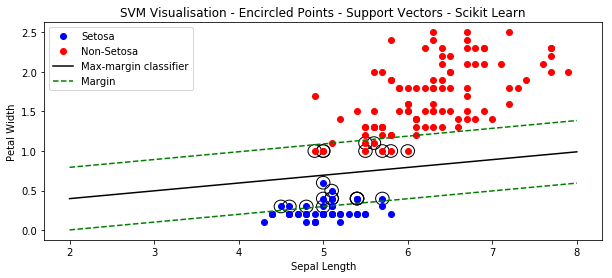

In [11]:
positive_class = []
negative_class = []
for i in range(len(X)):
    if (X[i].dot(svc.coef_[0])+svc.intercept_[0])<=1 and (X[i].dot(svc.coef_[0])+svc.intercept_[0])>=0:
        positive_class.append(X[i])
    if (X[i].dot(svc.coef_[0])+svc.intercept_[0])<=-0.00005 and (X[i].dot(svc.coef_[0])+svc.intercept_[0])>=-1.00005:
        negative_class.append(X[i])
        
plt.figure(figsize=(10,4))
ax=plt.gca()
for i in range(len(positive_class)):
    ax.add_artist(plt.Circle((positive_class[i][0],positive_class[i][1]),0.08,fill=False))
for i in range(len(negative_class)):
    ax.add_artist(plt.Circle((negative_class[i][0],negative_class[i][1]),0.08,fill=False))

plt.plot(X[:,0][:50],X[:,1][:50],"bo",label='Setosa')
plt.plot(X[:,0][50:],X[:,1][50:],"ro",label='Non-Setosa')
plt.plot([i for i in range(2,9)],[line(svc.coef_[0],i,svc.intercept_[0]) for i in range(2,9)],c='black',label='Max-margin classifier')
plt.plot([i for i in range(2,9)],[_class_(svc.coef_[0],i,1,svc.intercept_[0]) for i in range(2,9)],c='green',label='Margin',ls='--')
plt.plot([i for i in range(2,9)],[_class_(svc.coef_[0],i,-1,svc.intercept_[0]) for i in range(2,9)],c='green',ls='--')

plt.xlabel('Sepal Length',fontsize=10)
plt.ylabel('Petal Width')
plt.title('SVM Visualisation - Encircled Points - Support Vectors - Scikit Learn')
# ax.set_xlim((0,10))
# ax.set_ylim((0,10))
plt.legend()

### 1(a)(v)

In [12]:
df = pd.DataFrame()
pc = np.array(positive_class)
nc = np.array(negative_class)
new = []
for i in range(len(pc)):
    new.append(np.array([pc[i][0],pc[i][1],1]))
for i in range(len(nc)):
    new.append(np.array([nc[i][0],nc[i][1],-1]))
new = np.array(new)
df['SL']=new[:,0]
df['PW']=new[:,1]
df['y']=new[:,2]

In [13]:
new_X = np.array(df[['SL','PW']])
new_y = np.array(df['y'])
w = cp.Variable(2)
bias = cp.Variable()
objective = cp.Minimize(0.5*cp.norm(w,p=2)**2)
const = [new_y[i]*(new_X[i]*w+bias)>=1 for i in range(8)]
prob = cp.Problem(objective,constraints=const)
prob.solve()

2.476964218092535e-11

In [14]:
w.value,bias.value

(matrix([[-5.73716217e-09],
         [-5.05055838e-10]]), 2.372559431735482)

As can be seen from above, yes, indeed we get the same value for the coefficients even after solving only with the support vectors. This is because the maximum-margin is really determined only by the support vectors and only they contribute in the Lagrange Multiplier coefficients. The coefficients are non-zero only for the support vectors and are zero otherwise.

## Q1 (b)

Text(0.5, 1.0, 'Dataset Visualisation')

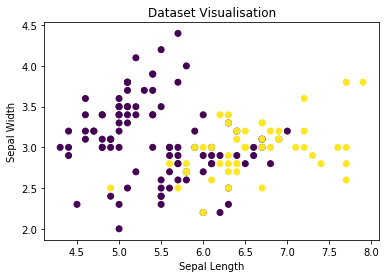

In [15]:
dataset = load_iris()
df = pd.DataFrame()
df['SL'] = dataset['data'][:,0]
df['SW'] = dataset['data'][:,1]
new = [-1]*150
new[100:] = [1]*50
df['Class']=new
X = np.array(df[['SL','SW']])
y = np.array(df['Class'])
plt.scatter(df['SL'],df['SW'],c=df['Class'])
plt.ylabel('Sepal Width')
plt.xlabel('Sepal Length')
plt.title('Dataset Visualisation')

### 1(b)(i) Autograd 

I think Autograd cannot be used in this case, since we do not have a differentiable function in Hinge Loss.<Br>
Autograd works well only when the function is differentiable.<br>
But surprisingly enough, it does seem to work in this case as illustrated below.

In [16]:
from autograd import grad
import autograd.numpy as npy

weights = npy.random.rand(2,1)
bias = npy.random.rand(1)

def autograd_loss(weights, bias):
    
    loss = (1 - (np.dot(X,weights).reshape(len(X)) + bias)*y)
    zeros = npy.zeros((loss.shape))
    loss = 1000*npy.where(loss>=0,loss,0)
    loss = npy.sum(loss) + npy.sum(weights**2)
    return loss


gradient_function = grad(autograd_loss)

alpha = 0.00001
for i in range(10000):
    weights -= gradient_function(weights,bias) * alpha
    if i%1000==0:
        print (autograd_loss(weights,bias))

2010016.1748811454
558732.9987758573
574355.2385125328
567458.6873394855
560563.8272294146
580601.2964196617
580265.9094197459
575548.7649609984
570844.656710199
563949.3946589214


In [17]:
## Used to compute the lines!
def line1(weights,x1,b1):
    return -(float(weights[0][0])*x1+b1)/(float(weights[1][0]))
def _class_1(weights,x1,cls,b1):
    return (cls-(b1+float(weights[0][0])*x1))/float(weights[1][0])

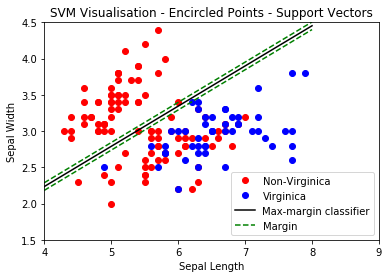

In [18]:

plt.plot(X[:,0][:100],X[:,1][:100],"ro",label='Non-Virginica')
plt.plot(X[:,0][100:],X[:,1][100:],"bo",label='Virginica')
plt.plot([i for i in range(4,9)],[line1(weights,i,bias[0]) for i in range(4,9)],c='black',label='Max-margin classifier')
plt.plot([i for i in range(4,9)],[_class_1(weights,i,1,bias[0]) for i in range(4,9)],c='green',label='Margin',ls='--')
plt.plot([i for i in range(4,9)],[_class_1(weights,i,-1,bias[0]) for i in range(4,9)],c='green',ls='--')
plt.xlim((4,9))
plt.ylim((1.5,4.5))
plt.xlabel('Sepal Length',fontsize=10)
plt.ylabel('Sepal Width')
plt.title('SVM Visualisation - Encircled Points - Support Vectors')
plt.legend()


### 1(b)(ii) and 1(b)(iii)

Implementation 1
* Here I am using the Hinge Loss Formulation

[[ 1.81818182e+00]
 [-6.04795244e-11]] -11.363636364078532


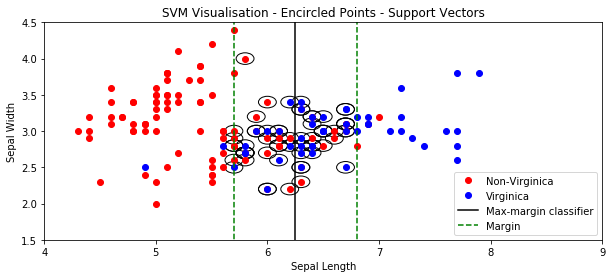

In [19]:
w = cp.Variable(2)
bias = cp.Variable()
e = cp.Variable(150)
C=1
objective = cp.Minimize(sum(cp.pos(1-cp.mul_elemwise(y,X*w + bias))) + 1/(2*C)*cp.norm(w,1))
prob = cp.Problem(objective)
prob.solve()
print(w.value,bias.value)
positive_class = []
negative_class = []
for i in range(len(X)):
    if (X[i]*w.value+bias.value)[0]<=1 and (X[i]*w.value+bias.value)[0]>=0:
        positive_class.append(X[i])
    if (X[i]*w.value+bias.value)[0]<=0 and (X[i]*w.value+bias.value)[0]>=-1:
        negative_class.append(X[i])
plt.figure(figsize=(10,4))
ax=plt.gca()
for i in range(len(positive_class)):
    ax.add_artist(plt.Circle((positive_class[i][0],positive_class[i][1]),0.08,fill=False))
for i in range(len(negative_class)):
    ax.add_artist(plt.Circle((negative_class[i][0],negative_class[i][1]),0.08,fill=False))

plt.plot(X[:,0][:100],X[:,1][:100],"ro",label='Non-Virginica')
plt.plot(X[:,0][100:],X[:,1][100:],"bo",label='Virginica')
plt.plot([i for i in range(4,9)],[line(w.value,i,bias.value) for i in range(4,9)],c='black',label='Max-margin classifier')
plt.plot([i for i in range(4,9)],[_class_(w.value,i,1,bias.value) for i in range(4,9)],c='green',label='Margin',ls='--')
plt.plot([i for i in range(4,9)],[_class_(w.value,i,-1,bias.value) for i in range(4,9)],c='green',ls='--')
plt.xlim((4,9))
plt.ylim((1.5,4.5))
plt.xlabel('Sepal Length',fontsize=10)
plt.ylabel('Sepal Width')
plt.title('SVM Visualisation - Encircled Points - Support Vectors')
plt.legend()


Implementation 2
* Here we are using the Normal Formulation

[[ 2.00000000e+00]
 [-3.87516732e-10]] -12.399999995174516


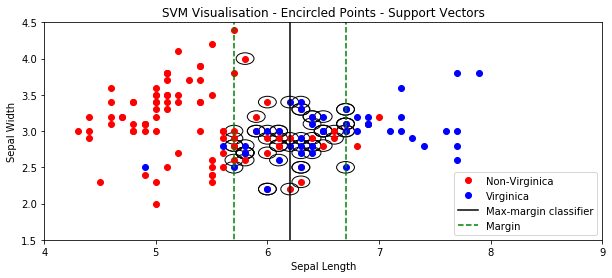

In [20]:
w = cp.Variable(2)
bias = cp.Variable()
e = cp.Variable(150)
C=1000
objective = cp.Minimize(0.5/C*cp.norm(w,p=2)**2+cp.norm(e,1))
const = []
for i in range(len(X)):
    const+=[
        y[i]*(X[i]*w+bias)>=1-e[i],
        e[i]>=0
    ]
prob = cp.Problem(objective,constraints=const)
prob.solve()
print(w.value,bias.value)
positive_class = []
negative_class = []
for i in range(len(X)):
    if (X[i]*w.value+bias.value)[0]<=1 and (X[i]*w.value+bias.value)[0]>=0:
        positive_class.append(X[i])
    if (X[i]*w.value+bias.value)[0]<=0 and (X[i]*w.value+bias.value)[0]>=-1:
        negative_class.append(X[i])
plt.figure(figsize=(10,4))
ax=plt.gca()
for i in range(len(positive_class)):
    ax.add_artist(plt.Circle((positive_class[i][0],positive_class[i][1]),0.08,fill=False))
for i in range(len(negative_class)):
    ax.add_artist(plt.Circle((negative_class[i][0],negative_class[i][1]),0.08,fill=False))

plt.plot(X[:,0][:100],X[:,1][:100],"ro",label='Non-Virginica')
plt.plot(X[:,0][100:],X[:,1][100:],"bo",label='Virginica')
plt.plot([i for i in range(4,9)],[line(w.value,i,bias.value) for i in range(4,9)],c='black',label='Max-margin classifier')
plt.plot([i for i in range(4,9)],[_class_(w.value,i,1,bias.value) for i in range(4,9)],c='green',label='Margin',ls='--')
plt.plot([i for i in range(4,9)],[_class_(w.value,i,-1,bias.value) for i in range(4,9)],c='green',ls='--')
plt.xlim((4,9))
plt.ylim((1.5,4.5))
plt.xlabel('Sepal Length',fontsize=10)
plt.ylabel('Sepal Width')
plt.title('SVM Visualisation - Encircled Points - Support Vectors')
plt.legend()

SKLearn SVM Implementation

[[ 1.99486933 -0.02267896]] [-12.30752713]


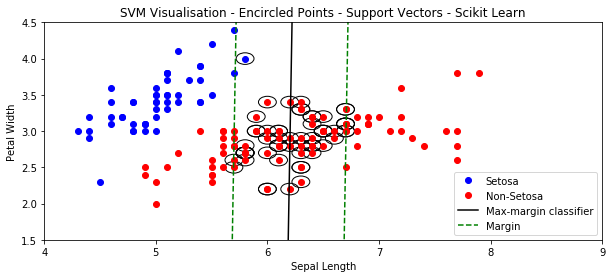

In [21]:
from sklearn.svm import SVC
svc = SVC(kernel='linear',C=1000)
svc.fit(X,y)
print(svc.coef_,svc.intercept_)
positive_class = []
negative_class = []
for i in range(len(X)):
    if (X[i].dot(svc.coef_[0])+svc.intercept_[0])<=1 and (X[i].dot(svc.coef_[0])+svc.intercept_[0])>=0:
        positive_class.append(X[i])
    if (X[i].dot(svc.coef_[0])+svc.intercept_[0])<=-0.00005 and (X[i].dot(svc.coef_[0])+svc.intercept_[0])>=-1.00005:
        negative_class.append(X[i])
        
plt.figure(figsize=(10,4))
ax=plt.gca()
for i in range(len(positive_class)):
    ax.add_artist(plt.Circle((positive_class[i][0],positive_class[i][1]),0.08,fill=False))
for i in range(len(negative_class)):
    ax.add_artist(plt.Circle((negative_class[i][0],negative_class[i][1]),0.08,fill=False))

plt.plot(X[:,0][:50],X[:,1][:50],"bo",label='Setosa')
plt.plot(X[:,0][50:],X[:,1][50:],"ro",label='Non-Setosa')
plt.plot([i for i in range(2,9)],[line(svc.coef_[0],i,svc.intercept_[0]) for i in range(2,9)],c='black',label='Max-margin classifier')
plt.plot([i for i in range(2,9)],[_class_(svc.coef_[0],i,1,svc.intercept_[0]) for i in range(2,9)],c='green',label='Margin',ls='--')
plt.plot([i for i in range(2,9)],[_class_(svc.coef_[0],i,-1,svc.intercept_[0]) for i in range(2,9)],c='green',ls='--')
plt.xlim((4,9))
plt.ylim((1.5,4.5))

plt.xlabel('Sepal Length',fontsize=10)
plt.ylabel('Petal Width')
plt.title('SVM Visualisation - Encircled Points - Support Vectors - Scikit Learn')
# ax.set_xlim((0,10))
# ax.set_ylim((0,10))
plt.legend()

The coefficients are not exactly the same, but they are matching more or less for the Scikit Learn Case as well as for CVXPY.

### 1(b)(iv)

In [22]:
from sklearn.svm import SVC
svc = SVC(kernel='rbf')
svc.fit(X,y)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

Gamma Variation for RBF Kernel

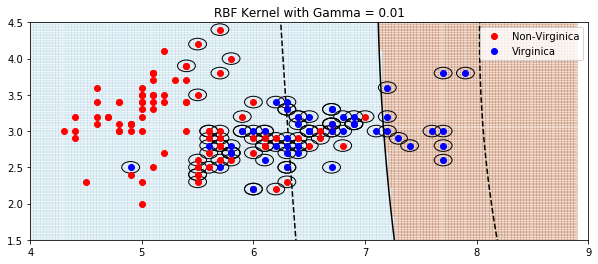

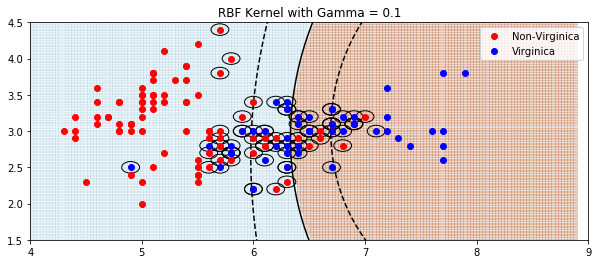

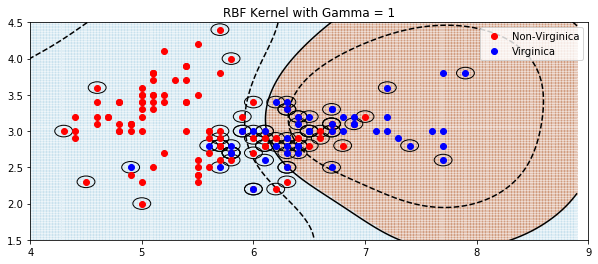

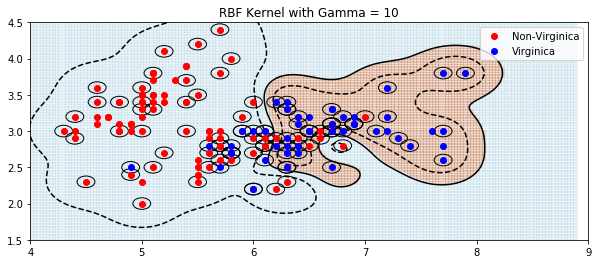

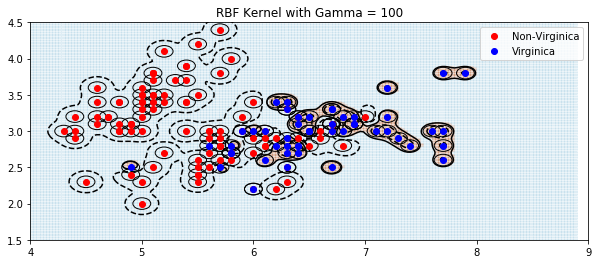

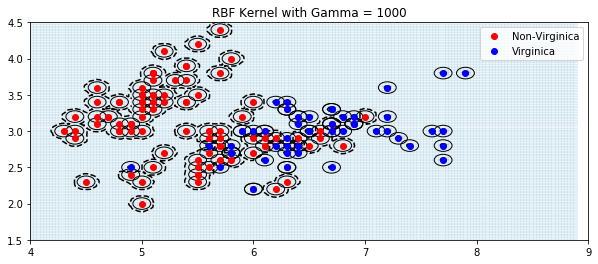

In [23]:
for gamm in [0.01,0.1,1,10,100,1000]:
    svc = SVC(kernel='rbf',gamma=gamm)
    svc.fit(X,y)
    plt.figure(figsize=(10,4))
    plt.plot(X[:,0][:100],X[:,1][:100],"ro",label='Non-Virginica')
    plt.plot(X[:,0][100:],X[:,1][100:],"bo",label='Virginica')
    ax=plt.gca()
    for i in range(len(X[svc.support_])):
        ax.add_artist(plt.Circle((X[svc.support_][:,0][i],X[svc.support_][:,1][i]),0.08,fill=False))

    plt.xlim((4,9))
    plt.ylim((1.5,4.5))
    x_min = X[:, 0].min()-1
    x_max = X[:, 0].max()+1
    y_min = X[:, 1].min()-1
    y_max = X[:, 1].max()+1

    XX, YY = np.mgrid[x_min:x_max:200j, y_min:y_max:200j]
    Z = svc.decision_function(np.c_[XX.ravel(), YY.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(XX.shape)
    plt.pcolormesh(XX, YY, Z > 0, cmap=plt.cm.Paired, alpha=0.2)

    plt.contour(XX, YY, Z, colors=['k', 'k', 'k'],
                linestyles=['--', '-', '--'], levels=[-.5, 0, .5])

    plt.title("RBF Kernel with Gamma = {}".format(gamm))
    svs = svc.support_vectors_

    plt.legend()

Polynomial Kernel with degree of polynomial varied

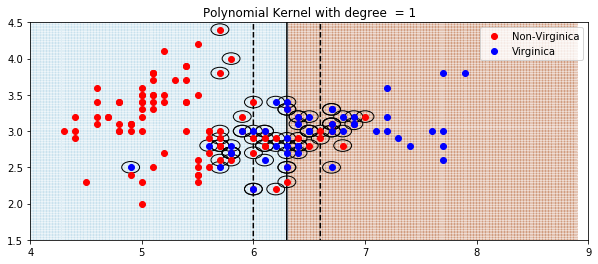

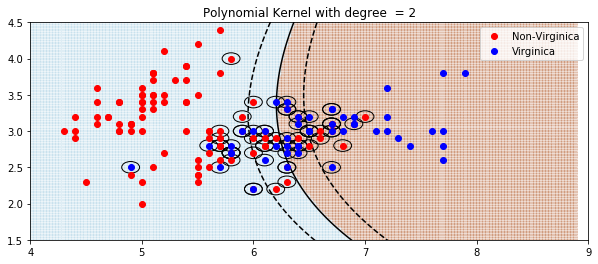

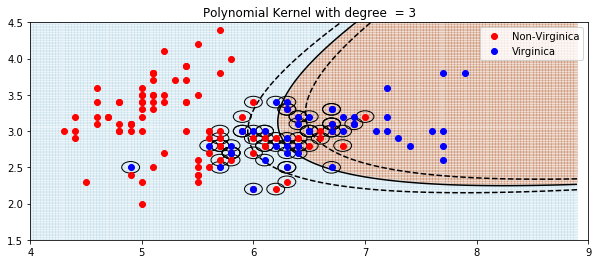

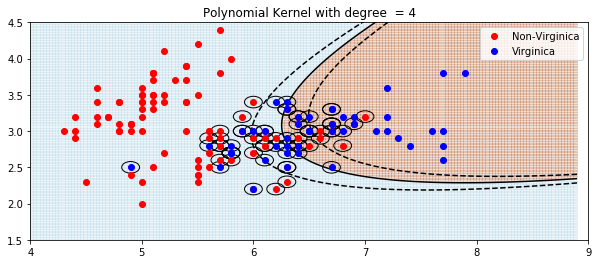

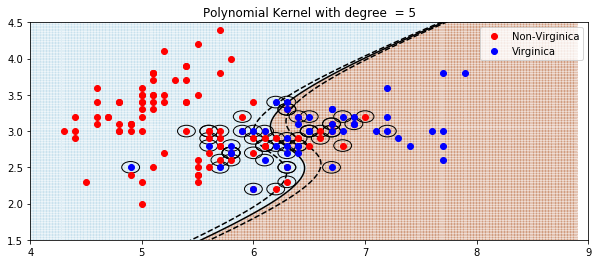

In [24]:
for deg in [1,2,3,4,5]:
    svc = SVC(kernel='poly',degree=deg)
    svc.fit(X,y)
    plt.figure(figsize=(10,4))
    plt.plot(X[:,0][:100],X[:,1][:100],"ro",label='Non-Virginica')
    plt.plot(X[:,0][100:],X[:,1][100:],"bo",label='Virginica')
    ax=plt.gca()
    for i in range(len(X[svc.support_])):
        ax.add_artist(plt.Circle((X[svc.support_][:,0][i],X[svc.support_][:,1][i]),0.08,fill=False))

    plt.xlim((4,9))
    plt.ylim((1.5,4.5))
    x_min = X[:, 0].min()-1
    x_max = X[:, 0].max()+1
    y_min = X[:, 1].min()-1
    y_max = X[:, 1].max()+1

    XX, YY = np.mgrid[x_min:x_max:200j, y_min:y_max:200j]
    Z = svc.decision_function(np.c_[XX.ravel(), YY.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(XX.shape)
    plt.pcolormesh(XX, YY, Z > 0, cmap=plt.cm.Paired, alpha=0.2)

    plt.contour(XX, YY, Z, colors=['k', 'k', 'k'],
                linestyles=['--', '-', '--'], levels=[-.5, 0, .5])

    plt.title("Polynomial Kernel with degree  = {}".format(deg))
    svs = svc.support_vectors_

    plt.legend()

Some observations:
* We can see that higher gamma means better fitting the data, similarly is the case with the polynomial case.
* This tells us that, by using the bias-variance tradeoff we need to choose gamma as well as degree of the polynomial suitably.
* Also, one more thing is the complexity in the decision boundary. The model becomes less and less interpretable as we increase gamma and the degree of the polynomial.